In [ ]:
!pip install torch torchvision
!TORCH_USE_CUDA_DSA=1 python -m pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 -f https://download.pytorch.org/whl/cu118/torch_stable.html

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

##**Data Preprocessing**

In [ ]:
#Importing Necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import transformers
from sklearn.preprocessing import LabelEncoder

In [ ]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, AdamW, GPT2Config
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

In [ ]:
#download all nltk libraries
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
#load the dataset
MBTI_Dataset = pd.read_csv('mbti_1.csv')

In [ ]:
#lets look at the data
MBTI_Dataset.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
#shape of the dataset
MBTI_Dataset.shape

(8675, 2)

In [ ]:
#dataset info
MBTI_Dataset.describe(include="object")

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [ ]:
#lets see if the dataset has null values
MBTI_Dataset.isna().sum()

type     0
posts    0
dtype: int64

In [ ]:
#observe the first post
MBTI_Dataset.posts.values[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [ ]:
#count of each personality type
MBTI_Dataset["type"].value_counts()

type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64

### **Exploratory Data Analysis**

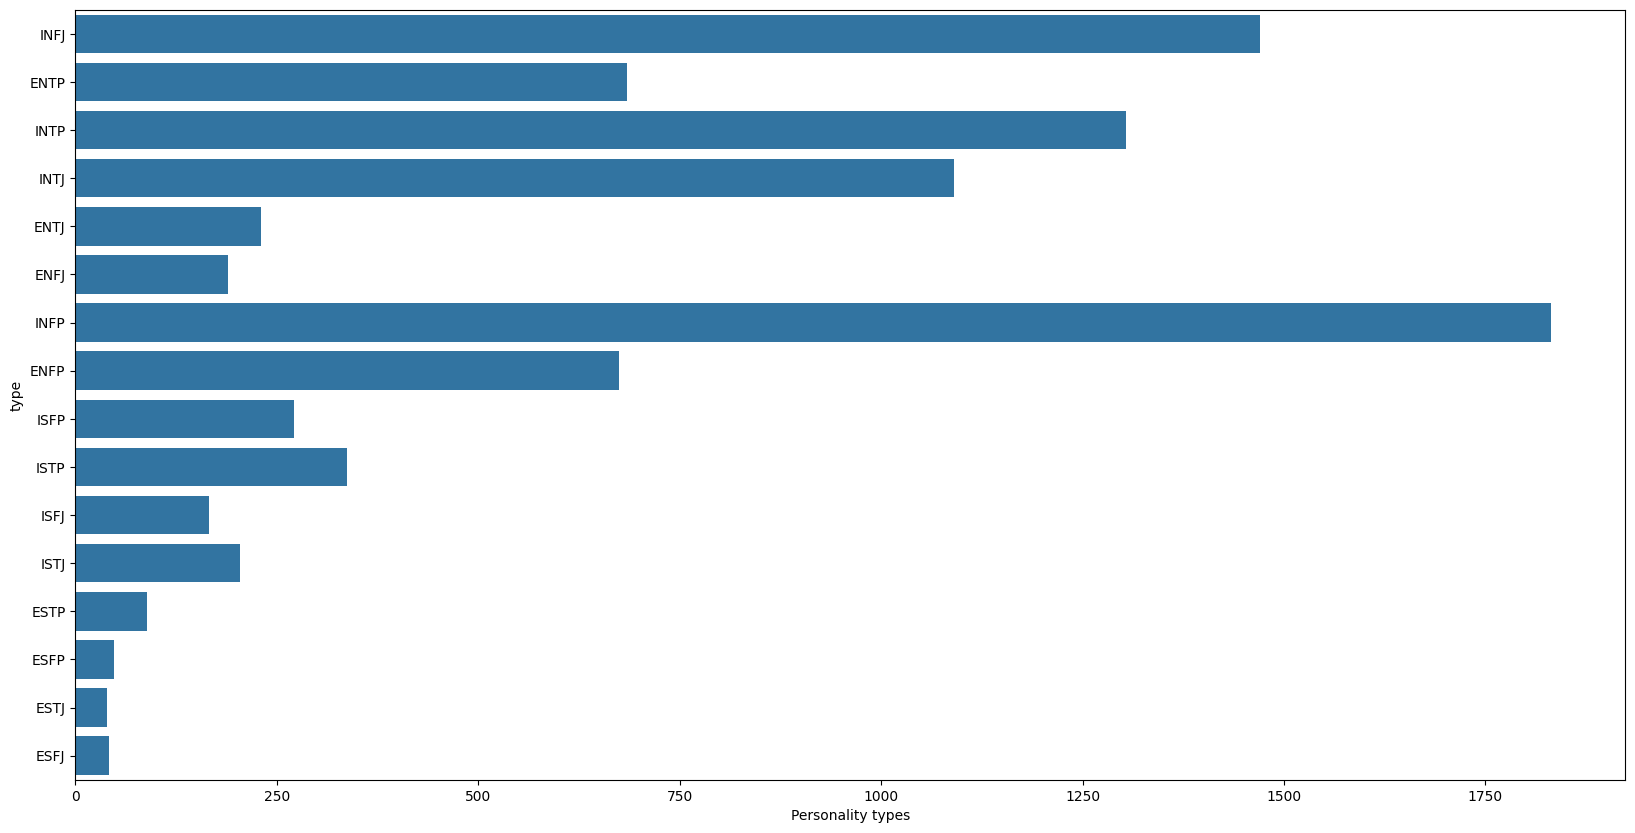

In [ ]:
#lets visualize the distribution of the personalities
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.countplot(MBTI_Dataset.type)
plt.xlabel('Personality types');

In [ ]:
# Created a function to clean and preprocess text in the Data

def cleaning_pre_processing(text):

    text = text.lower() # Converting all text from posts to lowercase to keep it in same level

    text = re.sub(r'[^a-zA-Z]', ' ', text) # Remove all non-alphabetic characters  in posts

    text=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',text) #removing links from text data

    text=re.sub('[^0-9a-z]',' ',text) #         #removing other symbols

    tokens = word_tokenize(text) # Tokenize texts for retrieiving more insights from each text from the posts

    stop_words = set(stopwords.words('english')) # Iniaiting stopwords like and,on,of like those to remove such words

    filtered_tokens = [word for word in tokens if word not in stop_words] # Now Removing stop words from the Text informaiton from posts

    processed_text = ' '.join(filtered_tokens) # Join all the tokens back again into text to make meaningful insight

    return processed_text

In [ ]:
# Applying the cleaning and pre-processing function that was created to the 'Posts' column

MBTI_Dataset['Cleaned_Posts'] = MBTI_Dataset['posts'].apply(cleaning_pre_processing)

In [ ]:
MBTI_Dataset.head()

,type,posts,Cleaned_Posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,http www youtube com watch v qsxhcwe krw http ...
1,ENTP,'I'm finding the lack of me in these posts ver...,finding lack posts alarming sex boring positio...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one https www youtube com watch v fhigbol...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation day esoteric ga...
4,ENTJ,'You're fired.|||That's another silly misconce...,fired another silly misconception approaching ...


In [ ]:
#cleaned post
MBTI_Dataset.Cleaned_Posts.values[0]

'http www youtube com watch v qsxhcwe krw http media tumblr com tumblr lfouy pma qa rooo jpg enfp intj moments https www youtube com watch v iz le g xm sportscenter top ten plays https www youtube com watch v ucdfze etec pranks life changing experience life http www youtube com watch v vxzeywwrdw http www youtube com watch v u ejam dp e repeat today may perc experience immerse last thing infj friend posted facebook committing suicide next day rest peace http vimeo com hello enfj sorry hear distress natural relationship perfection time every moment existence try figure hard times times growth http wallpaperpassion com upload friendship boy girl wallpaper jpg http assets dornob com wp content uploads round home design jpg welcome stuff http playeressence com wp content uploads red red pokemon master jpg game set match prozac wellbrutin least thirty minutes moving legs mean moving sitting desk chair weed moderation maybe try edibles healthier alternative basically come three items determi

In [ ]:
#lets see the stopwords
stopword_list = stopwords.words("english")

In [ ]:
#define funtion to get most frequent words
from collections import Counter
def get_most_frequent(data, stop_words, column="Cleaned_Posts", top=25):
    df = data[column].apply(lambda x: " ".join([word for word in x.split() if not word in stop_words]))
    counter = Counter(" ".join(df).split())
    return counter.most_common(top)

In [ ]:
#lets look at the most frequent words in the dataset
most_frequents = get_most_frequent(MBTI_Dataset, stopword_list)
most_frequents[:10]

[('like', 69707),
 ('think', 49849),
 ('people', 47913),
 ('one', 37244),
 ('know', 36953),
 ('really', 35307),
 ('would', 35036),
 ('get', 30826),
 ('time', 27642),
 ('com', 25875)]

In [ ]:
def show_most_frequents(most_frequent_words, top=20):
    most_frequent_df = pd.DataFrame(most_frequent_words)
    plt.figure(figsize=(16,4))
    my_cmap = plt.get_cmap("viridis")
    plt.bar(x=most_frequent_df.iloc[:top, 0], height=most_frequent_df.iloc[:top, 1], color="slateblue")
    plt.xlabel("Words", size=17)
    plt.ylabel("Counts", size=17)
    plt.title("Most Frequent Words", size = 20)
    plt.show()

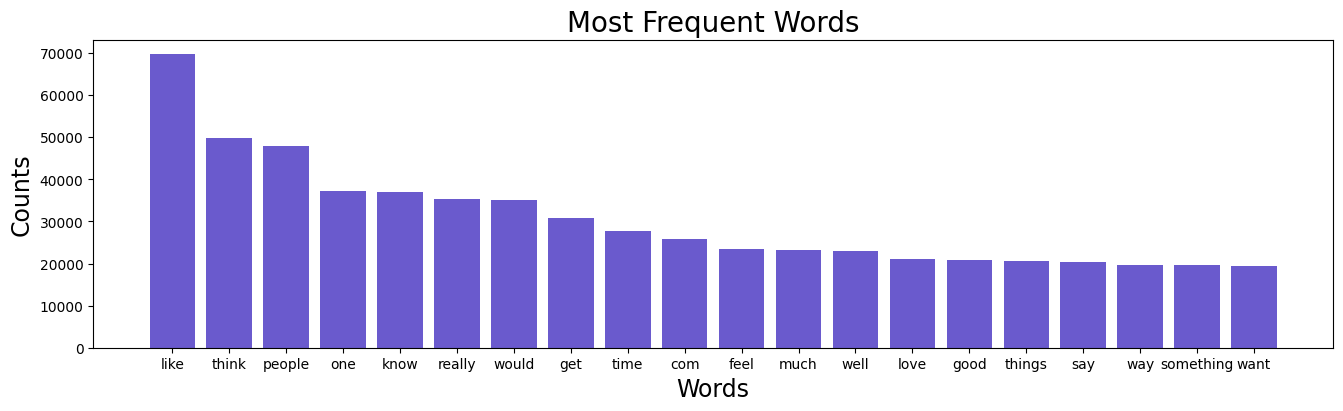

In [ ]:
#plot the results
show_most_frequents(most_frequents)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding the 'type' column
label_encoder = LabelEncoder()
MBTI_Dataset['Encoded_Type'] = label_encoder.fit_transform(MBTI_Dataset['type'])

In [ ]:
labels_3 = MBTI_Dataset.Encoded_Type.unique()
labels_3

array([ 8,  3, 11, 10,  2,  0,  9,  1, 13, 15, 12, 14,  7,  5,  6,  4])

In [ ]:
MBTI_Dataset.head()

,type,posts,Cleaned_Posts,Encoded_Type
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,http www youtube com watch v qsxhcwe krw http ...,8
1,ENTP,'I'm finding the lack of me in these posts ver...,finding lack posts alarming sex boring positio...,3
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one https www youtube com watch v fhigbol...,11
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation day esoteric ga...,10
4,ENTJ,'You're fired.|||That's another silly misconce...,fired another silly misconception approaching ...,2


In [ ]:
#save the dataset for further analysis
MBTI_Dataset.to_csv('cleaned_dataset_new.csv', index=False)

###**GPT2 Model Training and Evaluation**

In [ ]:
#configure the GPT2 model
configuration = GPT2Config()
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

# Set the pad token of the model's configuration
configuration.pad_token_id = tokenizer.eos_token_id

# Instantiate the model
model = GPT2ForSequenceClassification(configuration).from_pretrained("gpt2",num_labels=16)
# Set the padding token of the model's configuration
model.config.pad_token_id = model.config.eos_token_id
max_length=512

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#tokenizer.pad_token = tokenizer.eos_token
# Tokenization function
def tokenize_text(text):
    return tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

# Tokenize text data
MBTI_Dataset['tokenized_text'] = MBTI_Dataset['Cleaned_Posts'].apply(tokenize_text)

In [ ]:
# After tokenization
MBTI_Dataset.head()

,type,posts,Cleaned_Posts,Encoded_Type,tokenized_text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,http www youtube com watch v qsxhcwe krw http ...,8,"[input_ids, attention_mask]"
1,ENTP,'I'm finding the lack of me in these posts ver...,finding lack posts alarming sex boring positio...,3,"[input_ids, attention_mask]"
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one https www youtube com watch v fhigbol...,11,"[input_ids, attention_mask]"
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation day esoteric ga...,10,"[input_ids, attention_mask]"
4,ENTJ,'You're fired.|||That's another silly misconce...,fired another silly misconception approaching ...,2,"[input_ids, attention_mask]"


In [ ]:
# Split data into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    MBTI_Dataset['tokenized_text'].tolist(),
    MBTI_Dataset['Encoded_Type'].tolist(),
    test_size=0.2,
    random_state=42
)

In [ ]:
# Prepare input tensors
train_inputs = torch.cat([text['input_ids'] for text in train_texts], dim=0)
train_masks = torch.cat([text['attention_mask'] for text in train_texts], dim=0)
train_labels = torch.tensor(train_labels)
test_inputs = torch.cat([text['input_ids'] for text in test_texts], dim=0)
test_masks = torch.cat([text['attention_mask'] for text in test_texts], dim=0)
test_labels = torch.tensor(test_labels)

In [ ]:
# Define batch size
batch_size = 8

# Create train DataLoader
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create test DataLoader
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
# Load pre-trained GPT-2 model for sequence classification
#model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=16)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Define number of epochs
epochs = 5

# Move model to appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (score): Linear(in_features=768, out_features=16, bias=False)
)

In [ ]:
# Initialize a list to store training loss for each epoch
train_losses = []

# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_dataloader, desc=f'Epoch {epoch + 1}', unit=' batches'):
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}

        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    # Calculate average training loss for the epoch
    avg_train_loss = total_loss / len(train_dataloader)

    # Append the average training loss to the list
    train_losses.append(avg_train_loss)

    print(f'Epoch {epoch + 1}/{epochs}, Average training loss: {avg_train_loss:.4f}')

Epoch 1: 100%|██████████| 868/868 [13:23<00:00,  1.08 batches/s]


Epoch 1/5, Average training loss: 2.2203


Epoch 2: 100%|██████████| 868/868 [13:28<00:00,  1.07 batches/s]


Epoch 2/5, Average training loss: 1.4024


Epoch 3: 100%|██████████| 868/868 [13:30<00:00,  1.07 batches/s]


Epoch 3/5, Average training loss: 1.1210


Epoch 4: 100%|██████████| 868/868 [13:28<00:00,  1.07 batches/s]


Epoch 4/5, Average training loss: 0.9719


Epoch 5: 100%|██████████| 868/868 [13:27<00:00,  1.07 batches/s]

Epoch 5/5, Average training loss: 0.8322


In [ ]:
# Evaluation
model.eval()
predictions = []
true_labels = []

for batch in tqdm(test_dataloader, desc='Evaluating', unit=' batches'):
    batch = tuple(t.to(device) for t in batch)
    inputs = {'input_ids': batch[0], 'attention_mask': batch[1]}
    labels = batch[2].cpu().numpy()
    true_labels.extend(labels)

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predictions.extend(np.argmax(logits.cpu().numpy(), axis=1))


Evaluating: 100%|██████████| 217/217 [01:09<00:00,  3.14 batches/s]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy: }')

Accuracy:  0.6778097982708934


In [ ]:
from sklearn.preprocessing import LabelEncoder

# true_labels contains the target labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(true_labels)

# Print the classification report
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.74      0.41      0.53        41
           1       0.66      0.69      0.67       125
           2       0.69      0.57      0.62        44
           3       0.61      0.64      0.62       135
           4       0.75      0.43      0.55         7
           5       0.50      0.12      0.20         8
           6       0.67      0.57      0.62         7
           7       0.50      0.60      0.55        15
           8       0.63      0.69      0.66       288
           9       0.74      0.72      0.73       370
          10       0.66      0.62      0.64       193
          11       0.70      0.79      0.74       293
          12       0.90      0.58      0.70        45
          13       0.65      0.57      0.61        53
          14       0.78      0.64      0.70        44
          15       0.59      0.69      0.63        67

    accuracy                           0.68      1735
   macro avg       0.67   

In [ ]:
MBTI_Dataset.head(16)

,type,posts,Cleaned_Posts,Encoded_Type,tokenized_text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,http www youtube com watch v qsxhcwe krw http ...,8,"[input_ids, attention_mask]"
1,ENTP,'I'm finding the lack of me in these posts ver...,finding lack posts alarming sex boring positio...,3,"[input_ids, attention_mask]"
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one https www youtube com watch v fhigbol...,11,"[input_ids, attention_mask]"
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation day esoteric ga...,10,"[input_ids, attention_mask]"
4,ENTJ,'You're fired.|||That's another silly misconce...,fired another silly misconception approaching ...,2,"[input_ids, attention_mask]"
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,science perfect scientist claims scientific in...,10,"[input_ids, attention_mask]"
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",draw nails haha done professionals nails yes g...,8,"[input_ids, attention_mask]"
7,INTJ,'I tend to build up a collection of things on ...,tend build collection things desktop use frequ...,10,"[input_ids, attention_mask]"
8,INFJ,"I'm not sure, that's a good question. The dist...",sure good question distinction two dependant p...,8,"[input_ids, attention_mask]"
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,https www youtube com watch v w egj qs positio...,11,"[input_ids, attention_mask]"


In [ ]:
# Get unique encoded labels
unique_encoded_labels = MBTI_Dataset['Encoded_Type'].unique()

# Create a dictionary to map encoded labels to personality types
encoded_label_mapping = {}
for label in unique_encoded_labels:
    # Assuming df is your DataFrame containing the dataset
    personality_type = MBTI_Dataset[MBTI_Dataset['Encoded_Type'] == label]['type'].iloc[0]
    encoded_label_mapping[label] = personality_type

print(encoded_label_mapping)


{8: 'INFJ', 3: 'ENTP', 11: 'INTP', 10: 'INTJ', 2: 'ENTJ', 0: 'ENFJ', 9: 'INFP', 1: 'ENFP', 13: 'ISFP', 15: 'ISTP', 12: 'ISFJ', 14: 'ISTJ', 7: 'ESTP', 5: 'ESFP', 6: 'ESTJ', 4: 'ESFJ'}


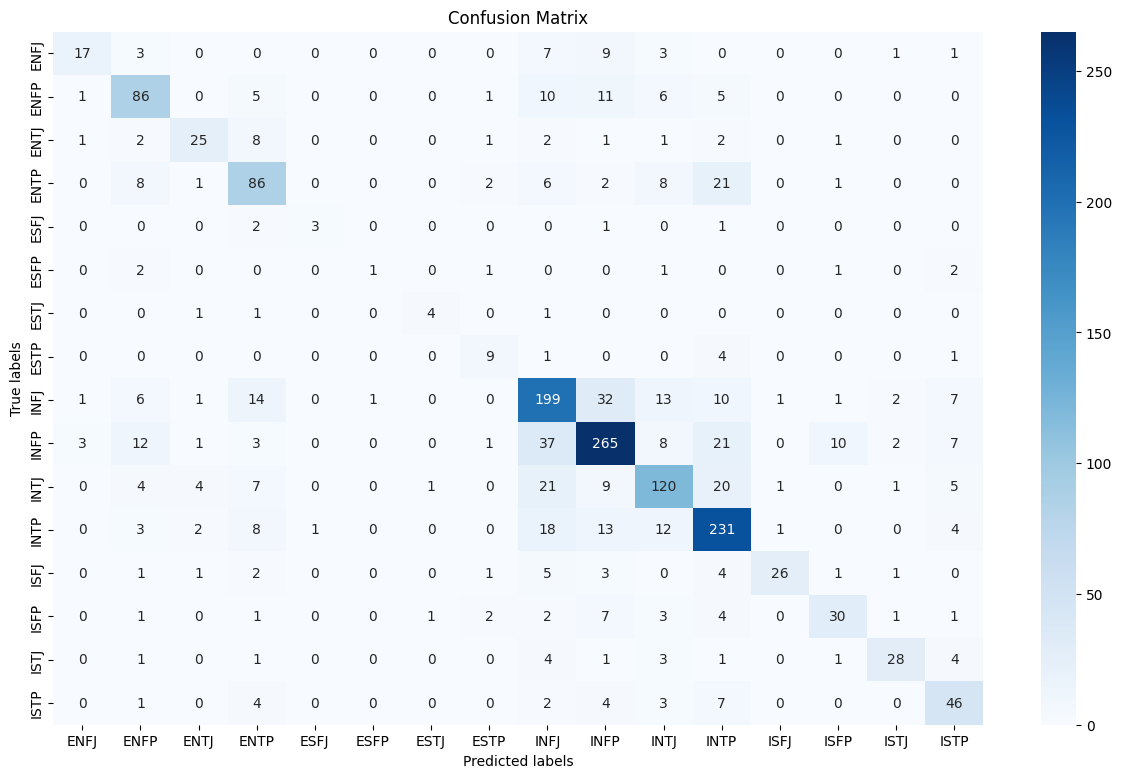

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Encoded mappings
encoded_mappings = {8: 'INFJ', 3: 'ENTP', 11: 'INTP', 10: 'INTJ', 2: 'ENTJ', 0: 'ENFJ', 9: 'INFP', 1: 'ENFP', 13: 'ISFP', 15: 'ISTP', 12: 'ISFJ', 14: 'ISTJ', 7: 'ESTP', 5: 'ESFP', 6: 'ESTJ', 4: 'ESFJ'}

# Replace encoded labels with corresponding personality types
labels_4 = [encoded_mappings[label] for label in np.unique(np.concatenate((true_labels, predictions)))]

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(15, 9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_4, yticklabels=labels_4)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score

# Convert the predictions and true labels to personality types
predicted_types = [encoded_mappings[p] for p in predictions]
true_types = [encoded_mappings[p] for p in true_labels]

# Calculate accuracy
accuracy = accuracy_score(true_types, predicted_types)

print(f"Overall Accuracy: {accuracy:.4f}")

# Calculate individual accuracy for each personality type
individual_accuracies = {}
for personality_type in encoded_mappings.values():
    true_indices = [i for i, t in enumerate(true_types) if t == personality_type]
    predicted_indices = [i for i, p in enumerate(predicted_types) if p == personality_type]
    correct_indices = set(true_indices) & set(predicted_indices)
    individual_accuracies[personality_type] = len(correct_indices) / len(true_indices)

# Print individual accuracy for each personality type
for personality_type, accuracy in individual_accuracies.items():
    print(f"Accuracy for {personality_type}: {accuracy:.4f}")


Overall Accuracy: 0.6778
Accuracy for INFJ: 0.6910
Accuracy for ENTP: 0.6370
Accuracy for INTP: 0.7884
Accuracy for INTJ: 0.6218
Accuracy for ENTJ: 0.5682
Accuracy for ENFJ: 0.4146
Accuracy for INFP: 0.7162
Accuracy for ENFP: 0.6880
Accuracy for ISFP: 0.5660
Accuracy for ISTP: 0.6866
Accuracy for ISFJ: 0.5778
Accuracy for ISTJ: 0.6364
Accuracy for ESTP: 0.6000
Accuracy for ESFP: 0.1250
Accuracy for ESTJ: 0.5714
Accuracy for ESFJ: 0.4286


In [ ]:
individual_accuracies

{'INFJ': 0.6909722222222222,
 'ENTP': 0.6370370370370371,
 'INTP': 0.78839590443686,
 'INTJ': 0.6217616580310881,
 'ENTJ': 0.5681818181818182,
 'ENFJ': 0.4146341463414634,
 'INFP': 0.7162162162162162,
 'ENFP': 0.688,
 'ISFP': 0.5660377358490566,
 'ISTP': 0.6865671641791045,
 'ISFJ': 0.5777777777777777,
 'ISTJ': 0.6363636363636364,
 'ESTP': 0.6,
 'ESFP': 0.125,
 'ESTJ': 0.5714285714285714,
 'ESFJ': 0.42857142857142855}

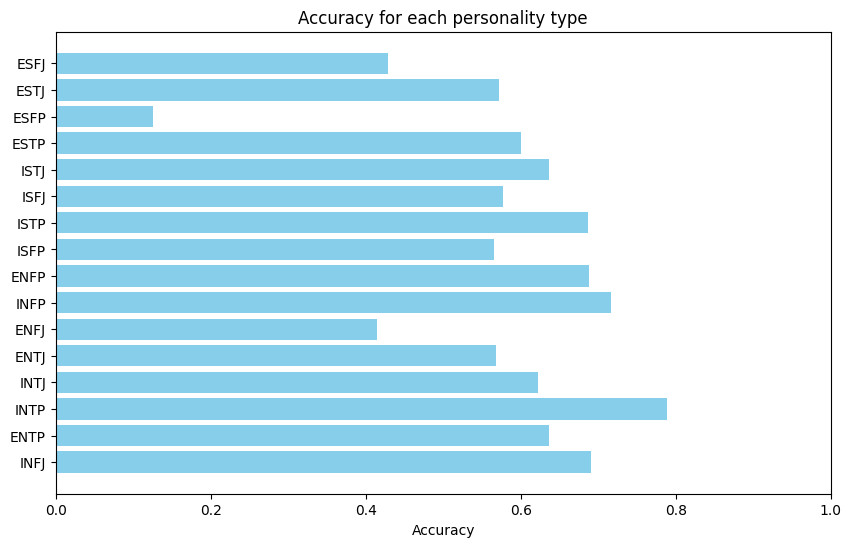

In [121]:
import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(10, 6))
plt.barh(list(individual_accuracies.keys()),individual_accuracies.values(), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy for each personality type')
plt.xlim(0, 1)  # Limiting x-axis from 0 to 1
plt.show()


In [ ]:
# Specify the directory where you want to save the model
output_dir = "/content/models"

# Save the model and tokenizer
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)


('/content/models/tokenizer_config.json',
 '/content/models/special_tokens_map.json',
 '/content/models/vocab.json',
 '/content/models/merges.txt',
 '/content/models/added_tokens.json')

Text(792.3131313131312, 0.5, 'True labels')

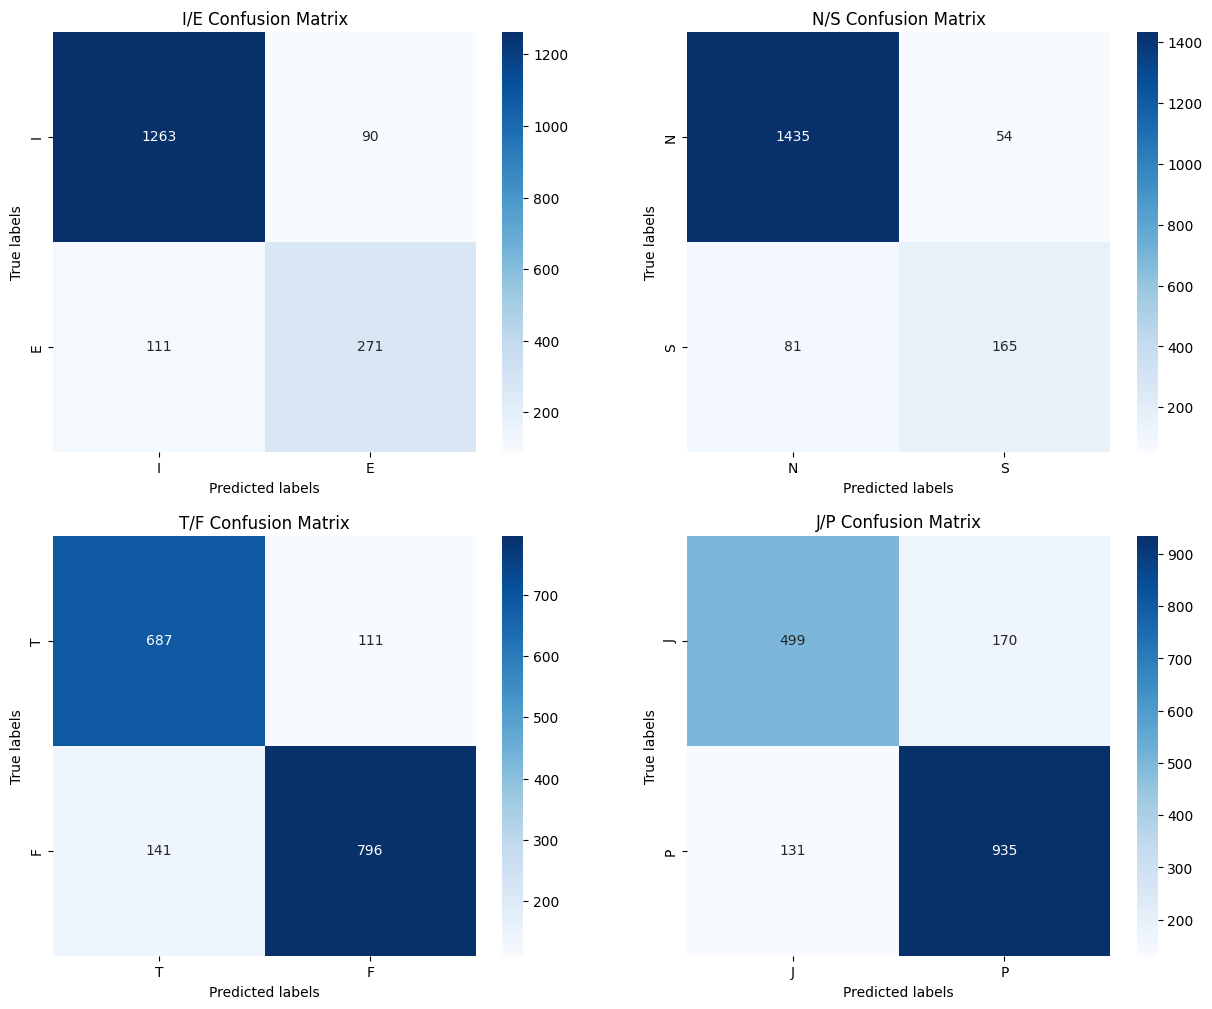

In [129]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Classify predictions and true labels into 16 personality types based on individual accuracies
predicted_types = [encoded_mappings[p] for p in predictions]
true_types = [encoded_mappings[p] for p in true_labels]

# Separate predicted and true types into I/E, N/S, T/F, J/P axes
IE_types = ['I', 'E']
NS_types = ['N', 'S']
TF_types = ['T', 'F']
JP_types = ['J', 'P']

# Initialize confusion matrices for each personality trait
cm_IE = np.zeros((2, 2), dtype=int)
cm_NS = np.zeros((2, 2), dtype=int)
cm_TF = np.zeros((2, 2), dtype=int)
cm_JP = np.zeros((2, 2), dtype=int)

# Fill confusion matrices
for true_type, pred_type in zip(true_types, predicted_types):
    true_IE, true_NS, true_TF, true_JP = true_type[0], true_type[1], true_type[2], true_type[3]
    pred_IE, pred_NS, pred_TF, pred_JP = pred_type[0], pred_type[1], pred_type[2], pred_type[3]

    true_IE_idx = IE_types.index(true_IE)
    pred_IE_idx = IE_types.index(pred_IE)
    true_NS_idx = NS_types.index(true_NS)
    pred_NS_idx = NS_types.index(pred_NS)
    true_TF_idx = TF_types.index(true_TF)
    pred_TF_idx = TF_types.index(pred_TF)
    true_JP_idx = JP_types.index(true_JP)
    pred_JP_idx = JP_types.index(pred_JP)

    cm_IE[true_IE_idx][pred_IE_idx] += 1
    cm_NS[true_NS_idx][pred_NS_idx] += 1
    cm_TF[true_TF_idx][pred_TF_idx] += 1
    cm_JP[true_JP_idx][pred_JP_idx] += 1

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.heatmap(cm_IE, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], xticklabels=IE_types, yticklabels=IE_types)
axes[0, 0].set_title('I/E Confusion Matrix')
axes[0, 0].set_xlabel('Predicted labels')
axes[0, 0].set_ylabel('True labels')

sns.heatmap(cm_NS, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1], xticklabels=NS_types, yticklabels=NS_types)
axes[0, 1].set_title('N/S Confusion Matrix')
axes[0, 1].set_xlabel('Predicted labels')
axes[0, 1].set_ylabel('True labels')

sns.heatmap(cm_TF, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0], xticklabels=TF_types, yticklabels=TF_types)
axes[1, 0].set_title('T/F Confusion Matrix')
axes[1, 0].set_xlabel('Predicted labels')
axes[1, 0].set_ylabel('True labels')

sns.heatmap(cm_JP, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1], xticklabels=JP_types, yticklabels=JP_types)
axes[1, 1].set_title('J/P Confusion Matrix')
axes[1, 1].set_xlabel('Predicted labels')
axes[1, 1].set_ylabel('True labels')


### **Testing the model with user input**

In [132]:
import os
dir_path = "/content/models/"
contents = os.listdir(dir_path)
print(contents)


['config.json', 'vocab.json', 'merges.txt', 'special_tokens_map.json', 'model.safetensors', 'tokenizer_config.json']


In [134]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [139]:
!pip install huggingface_hub
#You already have it if you installed transformers or datasets

!huggingface-cli login
#Log in using a token from huggingface.co/settings/tokens
#Create a model or dataset repo from the CLI if needed
!huggingface-cli repo create repo_name --type {model, dataset, space}


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) y
Token is valid (permission: write).
Your token has been saved in your con

In [140]:
from huggingface_hub import notebook_login

In [141]:
notebook_login()

In [143]:
#pushing our model to the hub
model.push_to_hub("Kavya11/Projectdeploy")

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Kavya11/Projectdeploy/commit/a04f4f106a0bb8345d78d796314aae9e838d9a5d', commit_message='Upload GPT2ForSequenceClassification', commit_description='', oid='a04f4f106a0bb8345d78d796314aae9e838d9a5d', pr_url=None, pr_revision=None, pr_num=None)

In [150]:
import torch
from transformers import GPT2ForSequenceClassification, GPT2Tokenizer

# Load pre-trained model and tokenizer
model = GPT2ForSequenceClassification.from_pretrained("Kavya11/Projectdeploy")

# Function to classify personality type based on input text
def classify_personality(input_text):
    # Tokenize input text
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding=True)

    # Perform classification
    outputs = model(**inputs)

    # Get predicted label
    predicted_label = torch.argmax(outputs.logits).item()

    return predicted_label

# User input
user_input = input("Enter a paragraph describing yourself: ")

# Classify personality type
predicted_label = classify_personality(user_input)

# Map predicted label to personality type
#personality_types = {{8: 'INFJ', 3: 'ENTP', 11: 'INTP', 10: 'INTJ', 2: 'ENTJ', 0: 'ENFJ', 9: 'INFP', 1: 'ENFP', 13: 'ISFP', 15: 'ISTP', 12: 'ISFJ', 14: 'ISTJ', 7: 'ESTP', 5: 'ESFP', 6: 'ESTJ', 4: 'ESFJ'}}

predicted_personality = encoded_label_mapping[predicted_label]

print("Predicted personality type:", predicted_personality)


Enter a paragraph describing yourself: Woke up this morning with a melody stuck in my head. Anyone else ever get song ideas in their dreams? #musicmaker Just finished reading "The Little Prince." So beautifully simple, yet so profound. Makes you question everything. #philosophy #books Spending the afternoon sketching in the park. The sunlight filtering through the leaves is pure magic. #naturephotography #artist ☀️ Feeling discouraged by the news lately. Wish people focused on understanding each other more. #peacebuilding #empathy Came across the most amazing quote: "We don't inherit the earth from our ancestors, we borrow it from our children." Let's leave them a better world. #sustainability #environment Anyone else ever feel overwhelmed by the beauty of nature? The vastness of the ocean makes me feel both small and strangely hopeful. #oceanlover #wonder Finished a new painting! It's a whimsical landscape inspired by a dream I had. What do you think? #fantasyart #imagination ✨ Just d